In [ ]:
# Ridge regression basically is solves the problem of overfitting in linear regression using Lambda parameter 

In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # grodsearchDV is used for hyperparameter tuning 

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd 
import seaborn as sns

In [4]:
dataframe = fetch_california_housing()
dataset = pd.DataFrame(dataframe.data)
dataset.columns = dataframe.feature_names


X = dataset
Y = dataframe.target


X_train, X_test , Y_train, Y_test  = train_test_split(X, Y, test_size = 0.30, random_state = 42)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
ridge_regressor = Ridge()  # here 'alpha' is alias for 'lambda'

In [7]:
parameters  = {'alpha' : [1,2,5,7,10,20,15,30,50,70]} # we will check which value will be gud for the param alpha 

ridgecv = GridSearchCV(ridge_regressor, parameters, scoring = 'neg_mean_squared_error', cv = 8)
ridgecv.fit(X_train, Y_train)

GridSearchCV(cv=8, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 7, 10, 20, 15, 30, 50, 70]},
             scoring='neg_mean_squared_error')

In [8]:
ridgecv.best_params_

{'alpha': 2}

In [9]:
pred = ridgecv.predict(X_test)

C:\Users\HP-PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


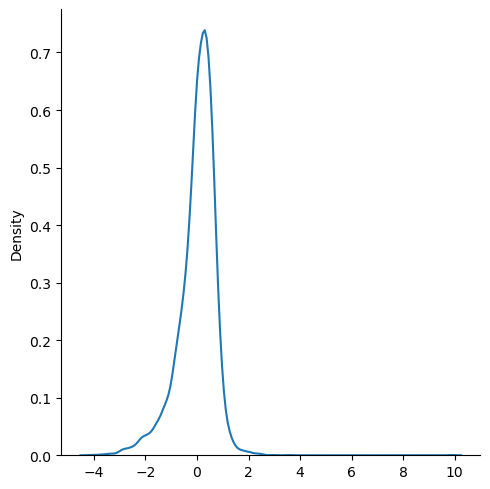

In [10]:
sns.displot(pred - Y_test, kind = 'kde')

In [12]:
# Lasso Regression is used to reduce overfitting & also for feature selection 


from sklearn.linear_model import Lasso


In [13]:
lasso = Lasso()

In [14]:
parameters  = {'alpha' : [1,2,5,7,10,20,15,30,50,70]} # we will check which value will be gud for the param alpha 

lasso_cv = GridSearchCV(lasso , parameters, scoring = 'neg_mean_squared_error', cv = 8)
lasso_cv.fit(X_train, Y_train)

GridSearchCV(cv=8, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 7, 10, 20, 15, 30, 50, 70]},
             scoring='neg_mean_squared_error')

In [15]:
lasso_cv.best_params_

{'alpha': 1}

In [16]:
lasso_pred = lasso_cv.predict(X_test)

C:\Users\HP-PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


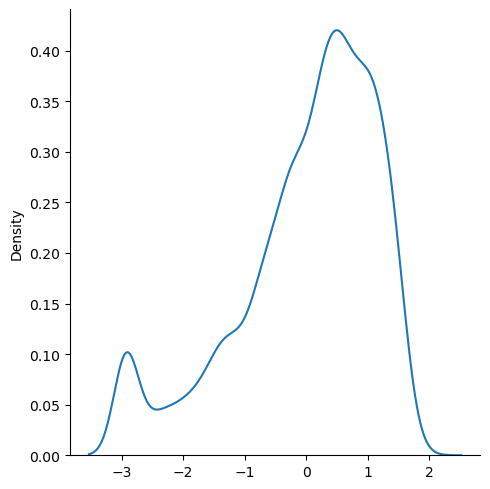

In [17]:
sns.displot(lasso_pred - Y_test, kind = 'kde')